In [4]:
import pandas as pd
import numpy as np
import math
import operator
import sys
import matplotlib.pyplot as plt
import statistics 
from statistics import mode
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, r2_score
from sklearn.metrics.pairwise import manhattan_distances
from sklearn.metrics import classification_report

class KNNClassifier:
    
    def __init__(self):
        name=""    
    train_data = pd.DataFrame()
    test_data = pd.DataFrame()
    
    def train(self,filename):
        self.train_data = (pd.read_csv(filename,header = None)).values
        #print(self.train_data)
        #print(len(self.train_data))
        #TrainSet, TestSet, TrainLabel, TestLabel = self.SplitData(self.train_data,0.7)
        
        #self.train_data = self.train_data[0:1000,:]
    
    
    def Read(self,filename):
        self.test_data = (pd.read_csv(filename, header = None)).values
        #self.test_data = self.test_data = self.test_data[0:1000,:]
        return self.test_data

    
    def find_distance_label(self,train_data , test , k , DistanceFlag):
        distance = []
        label = []
        #print(est)
        for point in self.train_data:
            point1 = point[1:]
            point2 = test
            #print(point)
           # print(point2)

            if(DistanceFlag==0):
                dist = np.linalg.norm( point2 - point1)
            else :
                 dist = np.sum([abs(x - y) for x, y in zip(point1, point2)])
            #print(dist)
            distance.append(dist)
            label.append(point[0])
            #print(label)
        #print(" label = ")    
        #print(len(label))
        #print(" distance= ")
        #print(len(distance))
        distanceLabelPair = [list(x) for x in zip(distance, label)]

        distanceLabelPair.sort()
        #print(type(distanceLabelPair))
        labelList = zip(*distanceLabelPair)[1]
        labelList = labelList[:k]
        #print(labelList)
        most_frequent = max(set(labelList), key=labelList.count)
        #print(most_frequent)
        #print(mode(labelList))
        #return mode(labelList)
        return most_frequent
    
      
    def evaluate_result( self, y_test, y_pred):
        matrix = confusion_matrix(y_test, y_pred)
        df = pd.DataFrame(matrix)
        df = df.transpose()
        print(df.head())
        f1 = f1_score(y_test, y_pred, average="macro")
        ps = precision_score(y_test, y_pred, average="macro")
        rs = recall_score(y_test, y_pred, average="macro")
        acs = accuracy_score(y_test, y_pred)
        print("accuracy_score\t : ", acs)
        return acs
        
    
    def evaluate_result1( self, y_test, y_pred):
        matrix = confusion_matrix(y_test, y_pred)
        df = pd.DataFrame(matrix)
        #df = df.transpose()
        f1 = f1_score(y_test, y_pred, average="macro")
        ps = precision_score(y_test, y_pred, average="macro")
        rs = recall_score(y_test, y_pred, average="macro")
        acs = accuracy_score(y_test, y_pred)
        return f1


    
    def Predict_for_validation(self,TestData, TrainData, TestLabel, TrainLabel):
        solution=[]
        k=3
        DistanceFlag =0
        for test in self.test_data:
            solution.append(find_distance_label(self.train_data,test,k,DistanceFlag))
        return solution
        
    def predict(self,filename):
        self.test_data=self.Read(filename)
        solution=[]
        k=3
        DistanceFlag =0
        for test in self.test_data:
            solution.append(self.find_distance_label(self.train_data,test,k,DistanceFlag))
        return solution
     
    def validate(self,TestSet,TrainSet,TestLabel):
        solution=[]
        k=1
        DistanceFlag =0
        i=0
        num = []

        for test in TestSet:
            solution.append(find_distance_label(TrainSet,test,k,DistanceFlag))
        return solution
    
        def validate_f1(self,TestSet,TrainSet,TestLabel):
            solution=[]
            k=1
            DistanceFlag =0
            i=0
            num = []
            for k in range(1,6):
                solution = []
                for test in TestSet:
                    solution.append(find_distance_label(TrainSet,test,k,DistanceFlag))
                num.append(self.evaluate_result1(TestLabel , solution))
            return num
    
        
    
#print("hey")

    

    

    

In [96]:
def find_distance_label(train_data , test , k , DistanceFlag):
    distance = []
    label = []
    for point in train_data:
        point1 = point[1:]
        point2 = test
        if(DistanceFlag==0):
            dist = np.linalg.norm(point2 - point1)
        else :
             dist = np.sum([abs(x - y) for x, y in zip(point1, point2)])
        distance.append(dist)
        label.append(point[0])
    distanceLabelPair = [list(x) for x in zip(distance, label)]

    distanceLabelPair.sort()
    labelList = zip(*distanceLabelPair)[1]
    labelList = labelList[:k]
    most_frequent = max(set(labelList), key=labelList.count)
    return most_frequent

In [48]:
knn_classifier = KNNClassifier()
k=3
knn_classifier.train('./Datasets/q1/train.csv')
predictions = knn_classifier.predict('./Datasets/q1/test.csv')
#print(predictions)
test_labels=[]

with open("./Datasets/q1/test_labels.csv") as f:
    for line in f:
        test_labels.append(int(line))

#print(test_labels)        
knn_classifier.evaluate_result(test_labels, predictions)




    0    1    2    3   4  5  6  7  8  9
0  93    0    0    0   0  0  0  0  1  2
1   0  101    0    0   1  0  0  2  0  0
2   0    0  107    0   0  0  0  1  1  1
3   0    0    0  107   0  1  0  0  2  0
4   0    0    0    0  82  0  0  1  0  0
('accuracy_score\t : ', 0.969)


In [86]:
import pandas as pd
def SplitData( trainData,  percent ):
    trainData = trainData.head(2000)
    mask = np.random.rand(len(trainData)) < percent
    TrainSet   = trainData[mask]
    TestSet    = trainData[~mask]
    TrainLabel = TrainSet[0]
    TestLabel  = TestSet[0]
    del TestSet[0]
    return TrainSet.values, TestSet.values, TrainLabel.values, TestLabel.values
TrainSet, TestSet, TrainLabel, TestLabel = SplitData(pd.read_csv('train.csv',header = None) , 0.7)    
knn_classifier1 = KNNClassifier()
predictions = knn_classifier1.validate(TestSet,TrainSet,TestLabel)

 For K : 
1
    0   1   2   3   4  5  6  7  8  9
0  46   0   2   0   0  1  2  0  0  1
1   0  65   2   2   1  1  0  3  3  0
2   0   0  66   1   0  0  0  0  3  0
3   0   0   1  53   0  2  0  0  1  0
4   0   0   0   0  52  1  1  0  0  1
('accuracy_score\t : ', 0.8885191347753744)
 For K : 
2
    0   1   2   3   4  5  6  7  8  9
0  47   0   3   0   0  1  3  0  0  1
1   0  65   2   4   2  2  0  4  3  0
2   0   1  67   1   0  0  0  0  0  0
3   0   0   0  53   0  3  0  0  0  0
4   0   0   0   0  47  2  3  1  0  1
('accuracy_score\t : ', 0.8668885191347754)
 For K : 
3
    0   1   2   3   4  5  6  7  8  9
0  47   0   2   0   0  1  2  0  0  1
1   0  65   2   5   2  2  0  3  3  0
2   0   1  67   1   0  0  0  0  0  0
3   0   0   0  50   0  2  0  0  1  0
4   0   0   0   0  52  0  0  0  0  1
('accuracy_score\t : ', 0.8901830282861897)
 For K : 
4
    0   1   2   3   4  5  6  7  8  9
0  46   0   2   0   0  1  2  0  0  1
1   0  65   2   4   2  2  0  3  3  0
2   0   1  69   1   0  0  0  1  0  0
3   0 

In [2]:
import pandas as pd
def SplitData( trainData,  percent ):
    trainData = trainData.head(2000)
    mask = np.random.rand(len(trainData)) < percent
    TrainSet   = trainData[mask]
    TestSet    = trainData[~mask]
    TrainLabel = TrainSet[0]
    TestLabel  = TestSet[0]
    del TestSet[0]
    return TrainSet.values, TestSet.values, TrainLabel.values, TestLabel.values

## Accuracy plot for the Training data and Validation data

 For K : 
1
    0   1   2   3   4  5  6  7  8  9
0  59   0   0   0   0  0  0  0  1  0
1   0  66   2   0   0  1  1  2  2  0
2   0   0  47   2   0  0  0  0  0  0
3   0   0   2  46   0  3  0  0  0  1
4   0   0   0   0  53  1  2  0  0  2
('accuracy_score\t : ', 0.9161073825503355)
 For K : 
2
    0   1   2   3   4  5  6  7  8  9
0  60   0   3   0   0  1  1  0  1  0
1   0  66   2   0   0  1  1  3  2  0
2   1   1  45   6   0  0  0  0  0  0
3   0   0   1  41   0  5  0  0  0  2
4   0   0   0   0  46  2  2  1  0  0
('accuracy_score\t : ', 0.889261744966443)
 For K : 
3
    0   1   2   3   4  5  6  7  8  9
0  61   0   1   0   0  1  0  0  2  0
1   0  66   3   0   0  2  1  3  2  0
2   0   0  45   2   0  0  0  0  0  0
3   0   0   1  44   0  3  0  0  0  2
4   0   0   1   0  51  1  0  0  0  0
('accuracy_score\t : ', 0.9043624161073825)
 For K : 
4
    0   1   2   3   4  5  6  7  8  9
0  61   0   1   0   0  1  0  0  2  0
1   0  66   2   0   0  2  1  2  2  0
2   0   1  45   4   0  0  0  0  0  0
3   0  

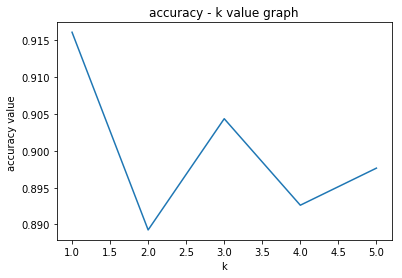

In [88]:
TrainSet, TestSet, TrainLabel, TestLabel = SplitData(pd.read_csv('train.csv',header = None) , 0.7)    
knn_classifier1 = KNNClassifier()
num = knn_classifier1.validate(TestSet,TrainSet,TestLabel)
ks  = [1,2,3,4,5] 
plt.plot(ks,num)
plt.xlabel('k') 
plt.ylabel('accuracy value ') 
plt.title('accuracy - k value graph') 
plt.show() 

### Classification Report

In [111]:
TrainSet, TestSet, TrainLabel, TestLabel = SplitData(pd.read_csv('train.csv',header = None) , 0.7)    
knn_classifier1 = KNNClassifier()
num = knn_classifier1.validate(TestSet,TrainSet,TestLabel)
print(classification_report(TestLabel,num))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        51
           1       0.89      1.00      0.94        74
           2       0.86      0.84      0.85        61
           3       0.85      0.87      0.86        53
           4       0.84      0.86      0.85        57
           5       0.88      0.81      0.84        53
           6       0.92      0.99      0.95        67
           7       0.80      0.86      0.83        71
           8       0.94      0.64      0.76        72
           9       0.75      0.81      0.78        69

   micro avg       0.86      0.86      0.86       628
   macro avg       0.87      0.87      0.86       628
weighted avg       0.87      0.86      0.86       628



In [26]:
import pandas as pd
import numpy as np
import math
import operator
import sys
import matplotlib.pyplot as plt
import statistics 
from statistics import mode
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, r2_score
from sklearn.metrics.pairwise import manhattan_distances
from sklearn.metrics import classification_report
import pandas as pd
def SplitData( trainData,  percent ):
    trainData = trainData.head(2000)
    mask = np.random.rand(len(trainData)) < percent
    TrainSet   = trainData[mask]
    TestSet    = trainData[~mask]
    TrainLabel = TrainSet[0]
    TestLabel  = TestSet[0]
    return TrainSet.values, TestSet.values, TrainLabel.values, TestLabel.values


from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
TrainSet, TestSet, TrainLabel, TestLabel = SplitData(pd.read_csv('train.csv',header = None),0.2)
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(TrainSet, TrainLabel)
#print(TestSet.shape)
#print(TrainSet.shape)
print(" accuracy : - ", knn.score(TestSet,TestLabel))



(' accuracy : - ', 0.8218135700697526)


### Comparison With Inbuilt Sklearn Knn Classifier

In [28]:
print(' Test Score : - ',knn.score(TestSet,TestLabel) )

(' Test Score : - ', 0.8218135700697526)


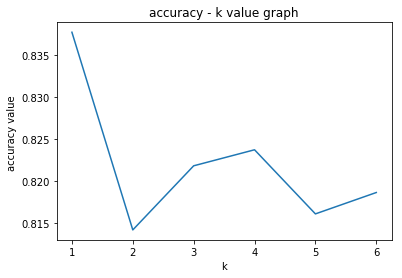

In [29]:
a=[]
ks = [1,2,3,4,5,6]
for i in range (1,7):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(TrainSet, TrainLabel)
    a.append(neigh.score(TestSet,TestLabel))
    
plt.plot(ks,a)
plt.xlabel('k') 
plt.ylabel('accuracy value ') 
plt.title('accuracy - k value graph') 
plt.show() 
    